
# ML-1: Collaborative filtering
## Project: Building a Restaurant Recommendation System

## Exploratory Data Analysis


**ML-1 Cohort 1** <br>

Name of people who have worked on this project: 

Nehal Sharma 11675

Keerthi Jayaram 11688

Manila Devaraj 11699

Gurushankar K. 500



***Note: For the Presentation Video, Project PPT and the Project Poster, refer: "https://drive.google.com/drive/folders/1slmgM369eDH0CVk2wectZopO1VpgMn4v"***

## Table of Contents 
* Problem Statement
* Introduction and description of data
* Importing essential libraries
* Loading the Dataset

## Problem Statement


We will create a recommendation system for restaurants using the Yelp Dataset for this. 
Based on the assumption that ***similar users will rate similar restaurants similarly***, Collaborative Filtering is a good choice for this recommender system.

Collaborative Filtering considers  explicit and implicit preferences of the users towards certain items.
CF thus relies on users' past behavior.

## Introduction and description of data

<img src="https://nick-morgan.github.io/Python-Recommendation-Engine-Yelp/images/datasetoverview.png" width=500/> 

***Image credits:https://nick-morgan.github.io/***


The Yelp data contains millions of reviews of different business types (e.g. restaurants and dry cleaners), and each business type has different set of attributes associated with them. Each review at minimum consists of review text and review star rating. Because of its size and richness, it presented an initial challenge for us to decide what data to include in our modeling and what features should be engineered.


The project workflow that we came up with is as follows :


* Create a baseline estimate of a rating. This simple model will be created by recording the biases of each user and item to make a baseline estimate of a given user-item combination.

* We then used a text similarity model based on the users "tips(text)" using item-to-item similarity as a method of collaborative filtering to improve our model further.

* To this end, we performed EDA on the data, specifically to look at relevant business attributes, user attributes, and reviews. We reasoned that these are the core information needed to link users and businesses with their preferences. Hence, we disregarded data which was not useful for model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

/home/nehal/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loding the dataset from reviews.json

In [51]:
review_json_path = 'yelp_academic_dataset_review.json'

In [52]:
size = 500000
review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [ ]:
# There are multiple chunks to be read
chunk_list = []
i=0
for chunk_review in review:
    if i<1:
        chunk_list.append(chunk_review)
        i+=1

In [ ]:
df = pd.concat(chunk_list[0:], ignore_index=True, join='outer', axis=0)

In [ ]:
df.to_csv("processed_data/reviews_subset1.csv")

In [26]:
df = pd.read_csv("review_subset1.csv")
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [31]:
df.shape

(500000, 10)

In [32]:
df.drop( labels="Unnamed: 0",
    axis=1,
    inplace=True,)

In [33]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [11]:
!pip install wordcloud

     |████████████████████████████████| 368kB 2.8MB/s eta 0:00:01


In [14]:
!pip install textblob

     |████████████████████████████████| 645kB 3.1MB/s eta 0:00:01


In [15]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud
from nltk.corpus import stopwords 

import re 
import string
import nltk # preprocessing text
from textblob import TextBlob

In [16]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/nehal/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
i = stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there'))

In [22]:
yelp_top_reviewd_biz = pd.DataFrame()

In [35]:
df_star_1=df[df["stars"]==1]
df_star_5=df[df["stars"]==5]

In [38]:
df_star_1_wordcloud=pd.DataFrame()
df_star_5_wordcloud=pd.DataFrame()

In [39]:
df_star_1_wordcloud['text_processed'] = df_star_1.text[:1000].apply(preprocess)
df_star_5_wordcloud['text_processed'] = df_star_5.text[:1000].apply(preprocess)

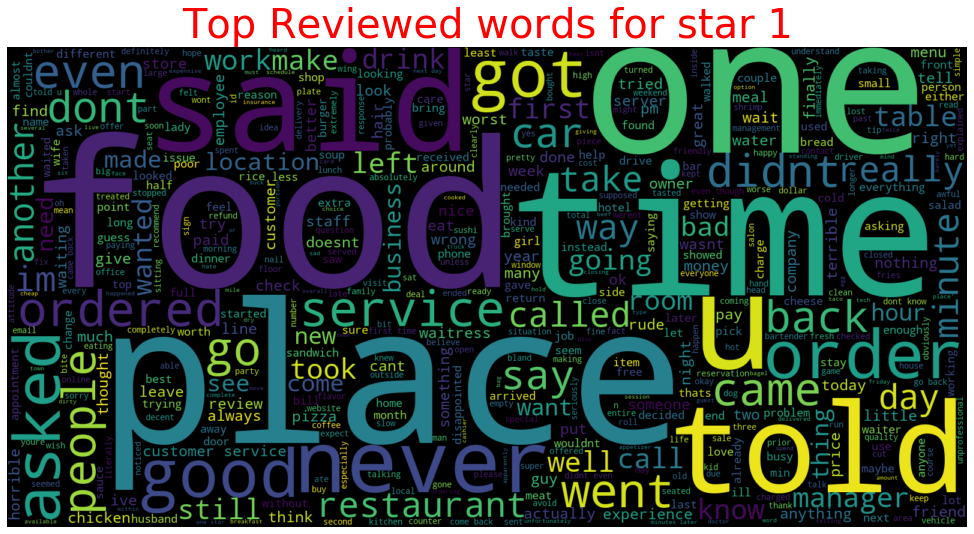

In [42]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='black',)
wordcloud.generate(str(set(df_star_1_wordcloud['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words for star 1", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

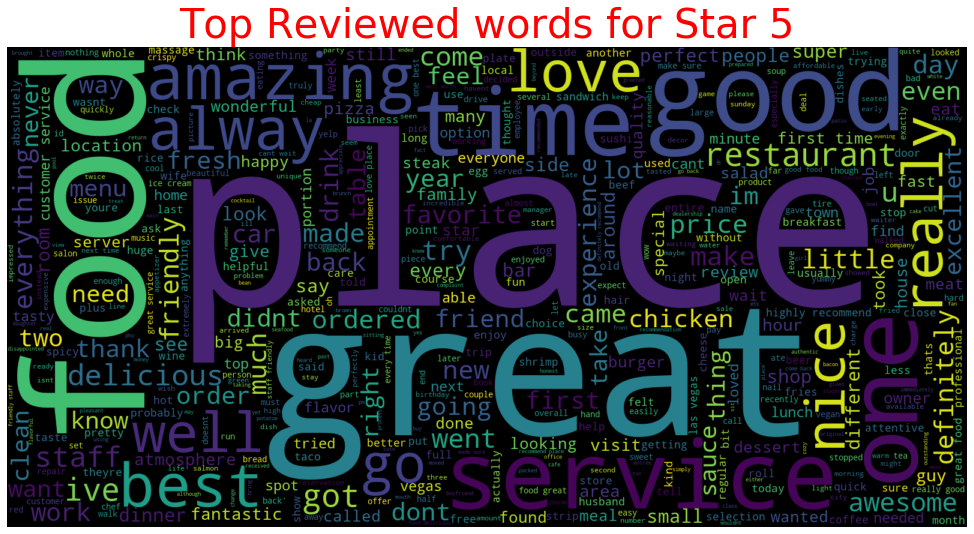

In [43]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='black',)
wordcloud.generate(str(set(df_star_5_wordcloud['text_processed'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top Reviewed words for Star 5", fontsize=40,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [44]:
df.drop( labels=["review_id","useful","funny","cool","text","date"],
    axis=1,
    inplace=True)

In [45]:
df.head()

,user_id,business_id,stars
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4


In [46]:
df.shape

(500000, 3)

In [47]:
viz_stars = df.groupby('stars',as_index=False).count()

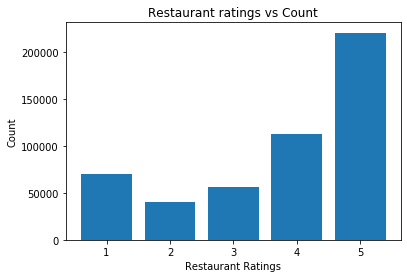

In [48]:
# fig,ax = plt.subplot()
plt.bar(viz_stars["stars"],viz_stars["business_id"])
plt.xlabel("Restaurant Ratings")
plt.ylabel("Count")
plt.title("Restaurant ratings vs Count");

In [49]:
import json

path = 'yelp_academic_dataset_business.json'
mydata = []
with open(path, encoding = 'utf-8') as fin:
    i = 0 
    for line in fin:
        line_contents = json.loads(line)
        categories = line_contents['categories']
        state = line_contents['state']
        try:
            if ('Restaurants' in categories or 'Food' in categories):
                mydata.append(line_contents)
                
        except TypeError:
            #print(line_contents)
            continue

In [50]:
len(mydata)

80492

In [51]:
column_names = mydata[1].keys()
for item in mydata:
    
    if len([x for x in item.keys() if x in column_names]) != len(item.keys()):
        print(item.keys())

In [52]:
data = []
for column in column_names:
    this_col = []
    for item in mydata:
        this_col.append(item[column])
    data.append(this_col)

In [53]:
column_names

dict_keys(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])

In [54]:
first_cols = list(column_names)
pd_data ={}
idx = 0
for column in first_cols:
    pd_data[column] = data[idx]
    idx+=1
business_df = pd.DataFrame(pd_data)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,1,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
2,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",None
3,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
4,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [55]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
1,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,1,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...","Desserts, Food, Ice Cream & Frozen Yogurt","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
2,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,0,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern",None
3,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,1,{'BusinessAcceptsCreditCards': 'True'},"Hotels & Travel, Transportation, Taxis, Beer, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
4,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [56]:
business_df.shape

(80492, 14)

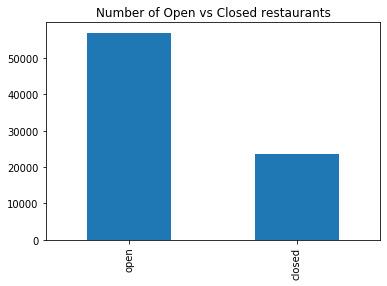

In [59]:
business_open={"open":0,"closed":0}
for i in business_df.is_open:
  if i ==1:
    business_open["open"]+=1
  else:
    business_open["closed"]+=1

business_open_closed_plot=pd.Series(business_open)
business_open_closed_plot.sort_values(ascending=False, inplace=True)
business_open_closed_plot[:10].plot(kind="bar", title = "Number of Open vs Closed restaurants");

In [62]:
# We drop the Businesses for which is_open = 0 s they are closed

In [60]:
business_df = business_df[business_df['is_open']==1]

In [61]:
business_df.shape

(56936, 14)

In [24]:
business_df.categories

0        Ethnic Food, Food Trucks, Specialty Food, Impo...
1                Desserts, Food, Ice Cream & Frozen Yogurt
3        Hotels & Travel, Transportation, Taxis, Beer, ...
4                   Restaurants, Cheesesteaks, Poutineries
5             Japanese, Fast Food, Food Court, Restaurants
                               ...                        
80483                                 Chinese, Restaurants
80484                              Sandwiches, Restaurants
80485    Nightlife, American (Traditional), Chicken Win...
80488    Restaurants, Pizza, Sandwiches, Fast Food, Chi...
80491    American (New), Food, Burgers, Restaurants, Fa...
Name: categories, Length: 56936, dtype: object

Text(0, 0.5, 'Count')

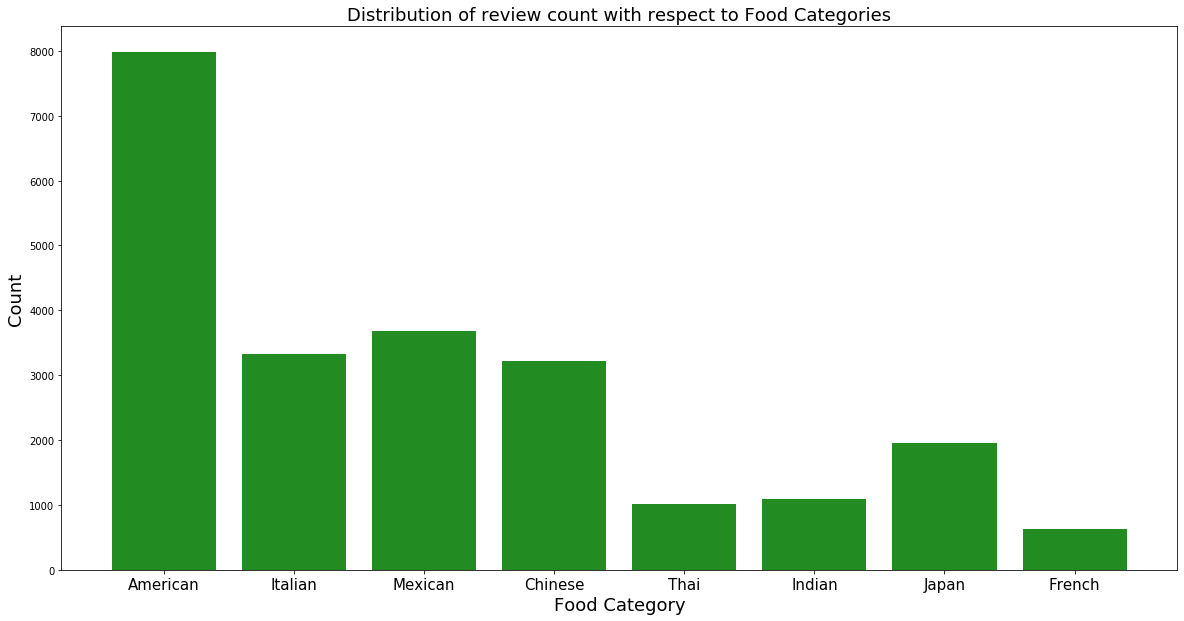

In [64]:
def get_food_type_count(category):
    count = business_df[business_df['categories'].str.contains(category)==True]['business_id'].count()
    return count
food_dict = {}
food_categories = ['American','Italian','Mexican','Chinese','Thai','Indian','Japan','French']
for food_category in food_categories:
    food_dict[food_category] = get_food_type_count(food_category)

plt.figure(figsize=(20,10))
plt.bar(range(len(food_dict)), food_dict.values(), align='center',color='forestgreen')
plt.xticks(range(len(food_dict)), list(food_dict.keys()),fontsize = 15);
plt.title('Distribution of review count with respect to Food Categories',fontsize=18)
plt.xlabel('Food Category',fontsize=18)
plt.ylabel('Count',fontsize=18)

In [65]:
business_df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [66]:
business_df.dropna(inplace=True)

In [67]:
business_df.shape

(46741, 14)

In [68]:
# ON has maximum number of reviews
business_df.groupby(['state']).agg(['count'])

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
,count,count,count,count,count,count,count,count,count,count,count,count,count
state,,,,,,,,,,,,,
AB,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320,2320
AL,1,1,1,1,1,1,1,1,1,1,1,1,1
AZ,9335,9335,9335,9335,9335,9335,9335,9335,9335,9335,9335,9335,9335
BC,2,2,2,2,2,2,2,2,2,2,2,2,2
CA,2,2,2,2,2,2,2,2,2,2,2,2,2
CO,2,2,2,2,2,2,2,2,2,2,2,2,2
FL,1,1,1,1,1,1,1,1,1,1,1,1,1
HI,1,1,1,1,1,1,1,1,1,1,1,1,1


In [69]:
business_df = business_df[business_df['state']=="ON"]

In [70]:
uniquebiz = business_df.business_id.unique()

In [71]:
len(uniquebiz)

10807

In [73]:
df['D'] = df.business_id.isin(uniquebiz)

In [74]:
df = df[df['D']==True]

In [75]:
df.drop( labels="D",
    axis=1,
    inplace=True,)

/home/nehal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
df.shape

(30783, 3)

In [77]:
df.head()

,user_id,business_id,stars
11,HJECayULRM-6xh2GCCvLiA,l-nL4BmhzpZjcavooO48PQ,4
25,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,4
43,Arf9ddxVvO3PsmdZlPBDyA,YJ2Y_asLIlbo-uijVugLow,5
44,iFEM16O5BeKvf_AHs6NzUQ,9Eghhu_LzEJgDKNgisf3rg,3
53,AdMCAKmNDIaubYPxnjTq1g,nIIuxIn5RU0j-XkDWh3hlA,1


In [78]:
business_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [79]:
business_df.shape

(10807, 14)

In [80]:
business_df.drop( labels=["address","state","postal_code","latitude","longitude","stars","review_count","is_open","attributes","hours"],
    axis=1,
    inplace=True)

In [81]:
business_df.shape

(10807, 4)

In [82]:
business_df.head(10)

,business_id,name,city,categories
4,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,Aurora,"Restaurants, Cheesesteaks, Poutineries"
7,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,Richmond Hill,"Persian/Iranian, Turkish, Middle Eastern, Rest..."
25,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,Toronto,"Vietnamese, Restaurants"
32,GtQPbazps0jt7_cJghfmsA,The Market by Longo's,Toronto,"Food, Grocery"
42,PYLv9n0y8MimzTK2zCBoFw,GIG@bites Internet Cafe,Toronto,"Home Services, Shopping, IT Services & Compute..."
51,34FYKG4pHNXbM9ZRRiJaGw,Tim Hortons,East York,"Cafes, Donuts, Food, Coffee & Tea, Restaurants"
58,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,Toronto,"Coffee & Tea, Restaurants, Sandwiches, Food"
65,cicPsia8Wj-DNRkmLbD_xg,The Keg Steakhouse + Bar,Toronto,"Steakhouses, Restaurants, Nightlife, Seafood, ..."
68,0nqQIM2PvOcTX6v0L537_Q,Fearless Meat,Toronto,"Fast Food, Burgers, Sandwiches, Restaurants"
70,tdtU7pk3swBuGYBQgyLgTw,LCBO,Toronto,"Beer, Wine & Spirits, Food"


In [83]:
business_df.drop( labels="city",
    axis=1,
    inplace=True)

In [84]:
users = df.user_id.unique()
business = df.business_id.unique()

In [85]:
userid2idx = {o:i for i,o in enumerate(users)}
businessid2idx = {o:i for i,o in enumerate(business)}

In [86]:
df['business_id'] = df.business_id.apply(lambda x: businessid2idx[x])
df['user_id'] = df.user_id.apply(lambda x: userid2idx[x])
business_df = business_df[business_df.business_id.isin(business)]
business_df['id'] = business_df.business_id.apply(lambda x: businessid2idx[x])

/home/nehal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nehal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
df.reset_index(inplace = True)

In [88]:
df.drop( labels="index",
    axis=1,
    inplace=True)

/home/nehal/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
df.shape

(30783, 3)

In [154]:
df.head(50)

,user_id,business_id,stars
0,0,0,4
1,1,1,4
2,2,2,5
3,3,3,3
4,4,4,1
5,5,5,2
6,6,6,3
7,7,7,5
8,8,8,5
9,9,9,5


In [90]:
business_df.head()

,business_id,name,categories,id
4,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"Restaurants, Cheesesteaks, Poutineries",933
25,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,"Vietnamese, Restaurants",90
32,GtQPbazps0jt7_cJghfmsA,The Market by Longo's,"Food, Grocery",28
42,PYLv9n0y8MimzTK2zCBoFw,GIG@bites Internet Cafe,"Home Services, Shopping, IT Services & Compute...",872
51,34FYKG4pHNXbM9ZRRiJaGw,Tim Hortons,"Cafes, Donuts, Food, Coffee & Tea, Restaurants",651


In [91]:
business_df = business_df.drop('business_id', axis=1).set_index('id')
business_df.head()

,name,categories
id,,
933,Philthy Phillys,"Restaurants, Cheesesteaks, Poutineries"
90,Mi Mi Restaurant,"Vietnamese, Restaurants"
28,The Market by Longo's,"Food, Grocery"
872,GIG@bites Internet Cafe,"Home Services, Shopping, IT Services & Compute..."
651,Tim Hortons,"Cafes, Donuts, Food, Coffee & Tea, Restaurants"


In [92]:
business_df.head()

,name,categories
id,,
933,Philthy Phillys,"Restaurants, Cheesesteaks, Poutineries"
90,Mi Mi Restaurant,"Vietnamese, Restaurants"
28,The Market by Longo's,"Food, Grocery"
872,GIG@bites Internet Cafe,"Home Services, Shopping, IT Services & Compute..."
651,Tim Hortons,"Cafes, Donuts, Food, Coffee & Tea, Restaurants"


In [93]:
business_names = business_df.name.to_dict()

In [94]:
df.to_csv("processed_data/reviews_contig.csv")
business_df.to_csv("processed_data/businesses_contig.csv")

***For the modelling, Please refer : Project_CF(Building a Baseline Restaurant Recommendation System).ipynb***